## Final Project: Spotify Clustering


In [1]:
##############################################
# Name: Calvin Truong
# Class: CIS 4321, Summer 2020
# Assignment: Final Project
# Date: 7/1/2020
#
# Description: 
##############################################

#### Load/Pre-Check the dataset

In [2]:
from sklearn import linear_model
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
linreg = linear_model.LinearRegression()

In [3]:
spotify_df = pd.read_csv('top50.csv', encoding="ISO-8859-1")
spotify_df.head()

,Unnamed: 0,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [4]:
#overview of the spotify dataframe
spotify_df.shape

(50, 14)

In [5]:
spotify_df.describe()

,Unnamed: 0,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [6]:
#check to see if there are any missing values in the data set
spotify_df.isnull().sum()

Unnamed: 0          0
Track_Name          0
Artist_Name         0
Genre               0
Beats_Per_Minute    0
Energy              0
Danceability        0
Loudness_dB         0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [7]:
#check the data type for each column
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track_Name        50 non-null     object
 2   Artist_Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats_Per_Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness_dB       50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence           50 non-null     int64 
 10  Length            50 non-null     int64 
 11  Acousticness      50 non-null     int64 
 12  Speechiness       50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


#### Drop Unnecessary Column

Since there are some columns that might not be useful for the data set. It is a good idea to organize the data and drop the following column: Unnamed.

In [8]:
spotify_df.drop('Unnamed: 0', inplace=True, axis=1)
spotify_df.head()

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### List the Top Song Genres

In [9]:
popular_genre = spotify_df.groupby('Genre').size().unique
popular_genre

<bound method Series.unique of Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64>

Text(0.5, 1.0, 'Genre vs Track Count')

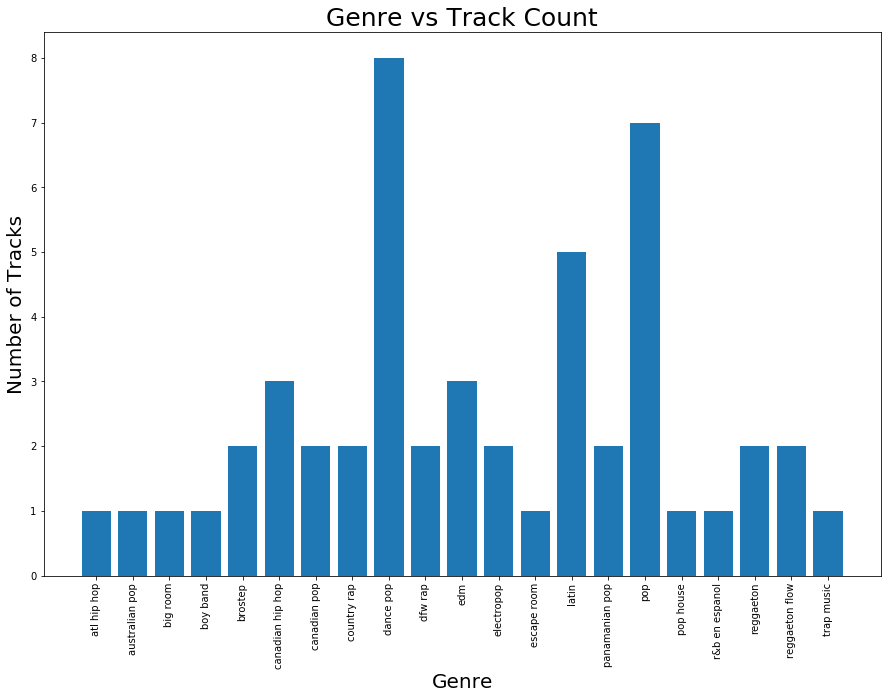

In [10]:
#Plot a bar chart visualization
xaxis = ['atl hip hop', 'australian pop', 'big room', 'boy band', 'brostep',
'canadian hip hop', 'canadian pop', 'country rap', 'dance pop',
'dfw rap', 'edm', 'electropop', 'escape room', 'latin',
'panamanian pop', 'pop', 'pop house', 'r&b en espanol',
'reggaeton','reggaeton flow', 'trap music']
count = np.arange(len(xaxis))
genregroupby = spotify_df.groupby('Genre')['Track_Name'].agg(len)
plt.figure(figsize = (15,10))
plt.bar(count, genregroupby)
plt.xticks(count,xaxis)
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Number of Tracks', fontsize = 20)
plt.title('Genre vs Track Count', fontsize = 25)

### Relationship between Attributes

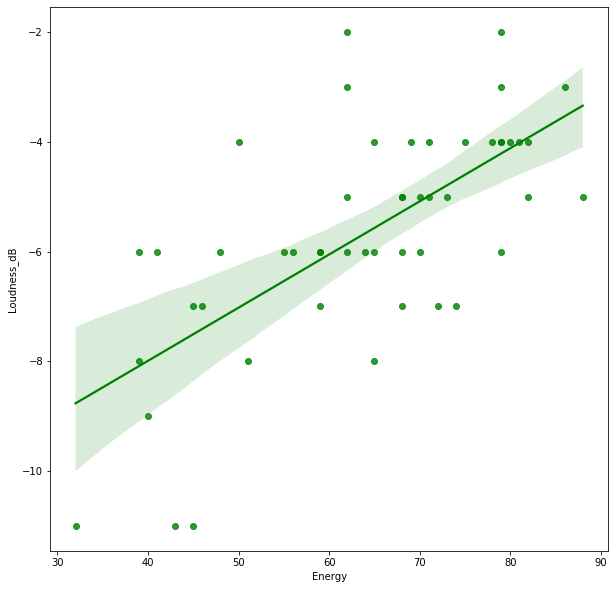

In [11]:
# Analyzing the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='Loudness_dB',data=spotify_df,color='green')

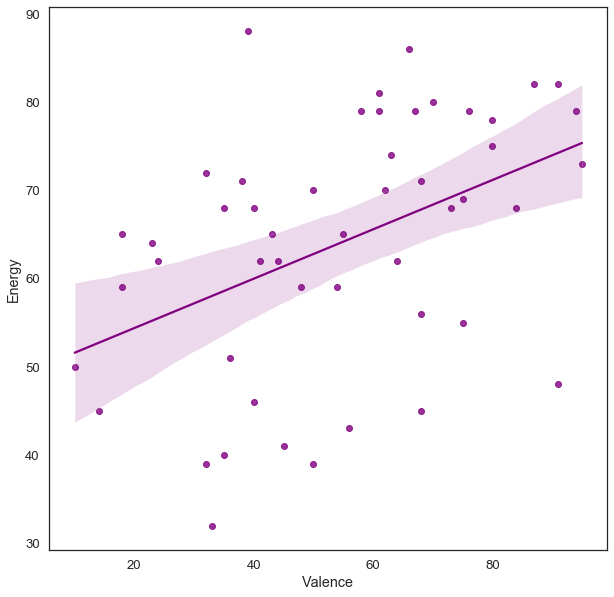

In [49]:
# Analyzing the relationship between energy and danceability
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Valence',y='Energy',data=spotify_df,color='purple')

### Training and Testing

In [13]:
from sklearn.model_selection import train_test_split

#define predictor matrix
spotify_predictor = spotify_df.drop(['Track_Name','Artist_Name','Genre','Popularity'], axis=1)
spotify_predictor.head()


,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness
0,117,55,76,-6,8,75,191,4,3
1,105,81,79,-4,8,61,302,8,9
2,190,80,40,-4,16,70,186,12,46
3,93,65,64,-8,8,55,198,12,19
4,150,65,58,-4,11,18,175,45,7


In [14]:
spotify_response = spotify_df['Popularity']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(spotify_predictor, spotify_response, test_size = 30, random_state = 0)

### Relationship between Predictor and Response

In [16]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Make Predictions from X_test will tell us the y_predict
pop_y_pred = linreg.predict(X_test)
pop_y_pred

array([ 85.02253139,  88.54943254, 100.27740569,  82.36552891,
        97.31645826,  88.28722166,  83.77977871,  93.3322049 ,
        87.27249176,  91.86927902,  88.77254963,  86.91232857,
        90.37382828,  89.9775435 ,  86.68070333,  88.4200054 ,
        89.35261934,  94.35587024,  90.62003003,  91.54857662,
        91.24466999,  86.2025473 ,  89.52546946,  94.30789709,
        90.4501691 ,  82.87962679,  86.72063479,  85.68741602,
        91.30401744,  87.13391102])

In [18]:
#compare with each other
y_test.head()

28    91
11    86
10    93
41    90
2     85
Name: Popularity, dtype: int64

In [19]:
#Find the base model results
#calculate R squared
print('R2:' , metrics.r2_score(y_test, pop_y_pred))
#calculate MSE
print('MSE:' , metrics.mean_squared_error(y_test, pop_y_pred))
#calculate RMSE
print('RMSE:' , np.sqrt(metrics.mean_squared_error(y_test, pop_y_pred)))

R2: -0.6123259456016881
MSE: 33.14942144157071
RMSE: 5.7575534249862335


### Most Significant Predictors

In [20]:
#scale data set
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)

In [21]:
#fit the recursive feature in the model
from sklearn.feature_selection import RFE

In [22]:
#construct RFE model using linreg and choosing the top 5 features
rfe = RFE(linreg, n_features_to_select=5)

In [23]:
#call the fit method for RFE
rfe.fit(scaled_X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [24]:
#eliminate all irrelavnt columns
x_test_rfe = X_test[X_test.columns[rfe.support_]]
x_test_rfe

,Loudness_dB,Liveness,Valence,Acousticness,Speechiness
28,-3,6,66,11,6
11,-4,15,38,28,7
10,-5,24,24,60,31
41,-6,7,73,1,5
2,-4,16,70,12,46
27,-7,19,40,37,3
38,-5,11,95,4,6
31,-11,9,33,59,33
22,-4,9,58,14,7
4,-4,11,18,45,7


In [25]:
x_train_rfe = X_train[X_train.columns[rfe.support_]]
x_train_rfe

,Loudness_dB,Liveness,Valence,Acousticness,Speechiness
5,-5,9,84,9,4
17,-6,7,91,56,5
40,-7,10,40,2,3
49,-6,7,61,21,12
1,-4,8,61,8,9
12,-6,11,45,75,3
37,-5,36,91,13,5
24,-11,12,68,25,30
6,-6,7,23,2,29
23,-4,44,80,36,4


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor()

In [28]:
rf.fit(scaled_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [29]:
rf.feature_importances_

array([0.13798742, 0.10764488, 0.19193133, 0.04275346, 0.11811807,
       0.08204512, 0.11310237, 0.07823329, 0.12818406])

In [30]:
#List the top 5 importance feature
spotify_importance = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns = ['Importance']).sort_values('Importance', ascending = False)
spotify_importance

,Importance
Danceability,0.191931
Beats_Per_Minute,0.137987
Speechiness,0.128184
Liveness,0.118118
Length,0.113102
Energy,0.107645
Valence,0.082045
Acousticness,0.078233
Loudness_dB,0.042753


#### Bar Chart for Feature Importance

In [31]:
#labels for the bar chart
features = X_train.columns
importance = rf.feature_importances_
indices = np.argsort(importance)

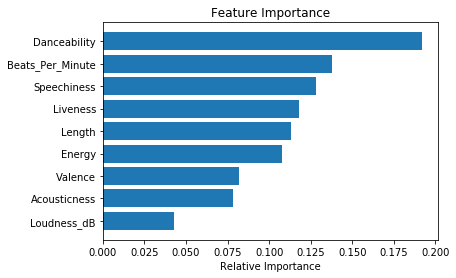

In [32]:
#horizontal bar chart
plt.barh(range(len(indices)), importance[indices])
#label y axis
plt.yticks(range(len(indices)), features[indices]);
#label x and title
plt.xlabel('Relative Importance')
plt.title("Feature Importance");

### Data Transformation
Normalizing Data

Tracked name, artist name, and genre should be excluded and will be used again after the preprocessing and clustering process. 

In [33]:
#import preprocessing library
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [10,8]})

In [34]:
#define X matrix
X = spotify_df.drop(['Track_Name','Artist_Name','Genre'], axis=1)
X.head()

,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,117,55,76,-6,8,75,191,4,3,79
1,105,81,79,-4,8,61,302,8,9,92
2,190,80,40,-4,16,70,186,12,46,85
3,93,65,64,-8,8,55,198,12,19,86
4,150,65,58,-4,11,18,175,45,7,94


#### Fit and Scale

In [35]:
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

#### Run PCA on X 

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA()
pca.fit(scaled_X)
X_pca = pca.transform(scaled_X)

#### Run KNN and Silhouette Analysis

In [38]:
def silhouette_analyse(input_data):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np


    range_n_clusters = [2, 3, 4, 5]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters)
        cluster_labels = clusterer.fit_predict(input_data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(input_data, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(input_data, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(input_data[:, 0], input_data[:, 1], marker='.', s=200, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=500, edgecolor='k')


    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.13745139763479505
For n_clusters = 3 The average silhouette_score is : 0.14013475279401452
For n_clusters = 4 The average silhouette_score is : 0.13811971082590208
For n_clusters = 5 The average silhouette_score is : 0.16147783598749021


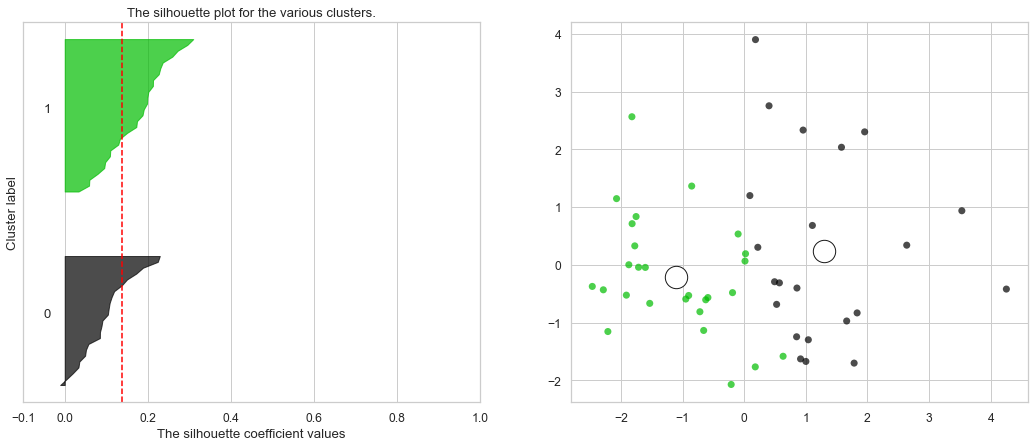

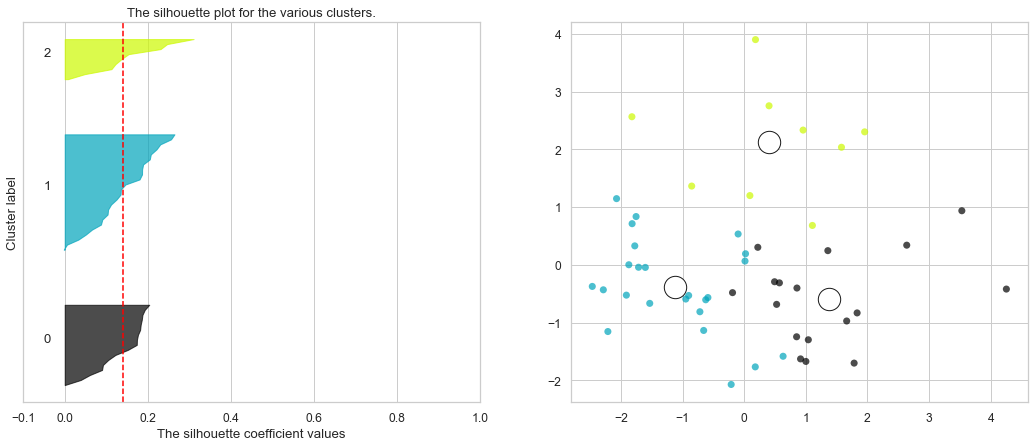

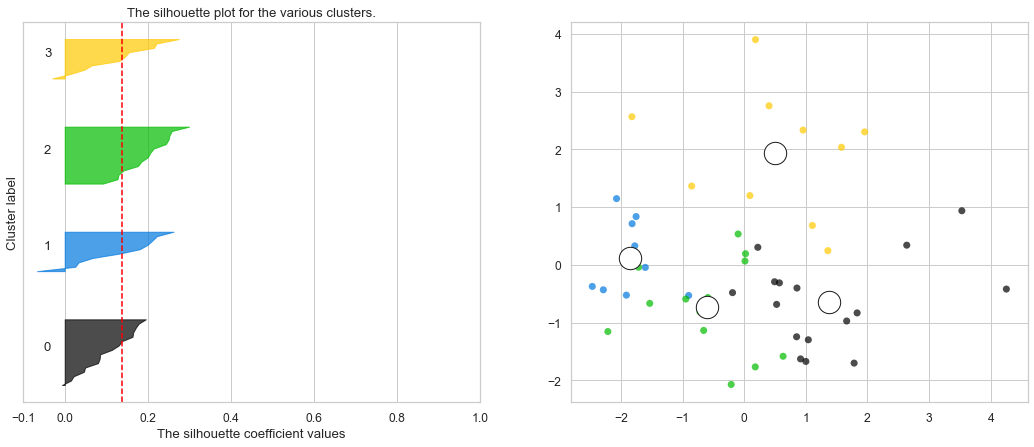

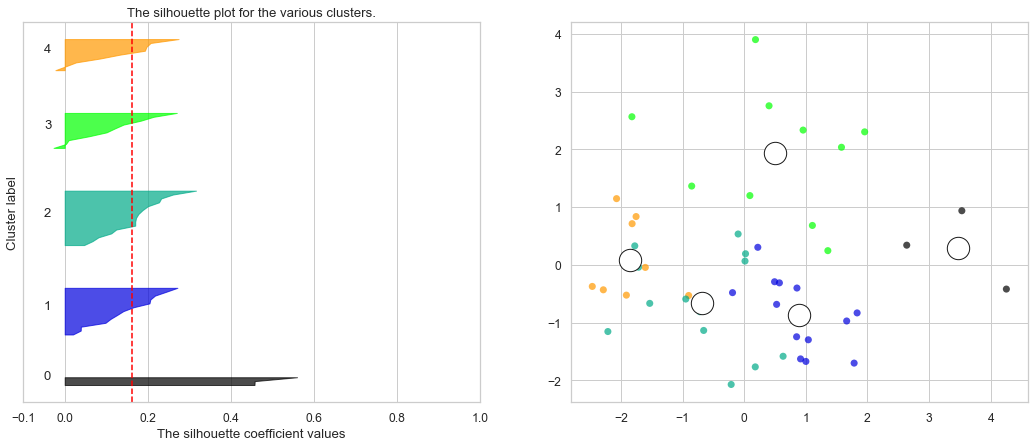

In [39]:
silhouette_analyse(X_pca)

This shows that the best cluster amount should be at 5.

#### Run KMeans with optimum K and predict output

In [40]:
from sklearn.cluster import KMeans

In [41]:
spotify_km = KMeans(n_clusters=5).fit(X_pca)
spotify_km_output = spotify_km.predict(X_pca)

In [42]:
#Add labels to the dataframe
spotify_df["Label"] = spotify_km_output
spotify_df

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Label
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,0
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,1
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,1
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,4
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,4
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,0
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,2
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,4
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87,0
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,2


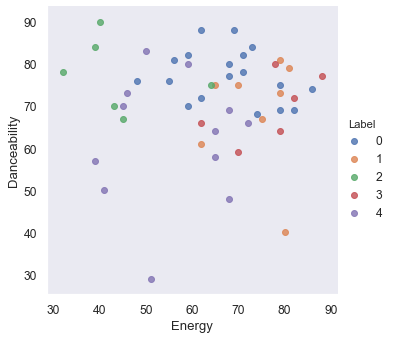

In [43]:
#Run seaborn and create scatter plots of the clusters
import seaborn as sns
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('dark')

#define a custom palette
facet = sns.lmplot(data=spotify_df, x='Energy', y='Danceability', hue='Label', 
                   fit_reg=False)

Rename clusters for the plots

In [52]:
def a(label):
    if label == 0:
        return 'High Energy, Danceable'
    elif label == 1:
        return 'Mid Energy, Lowly Danceable' 
    elif label == 2:
        return 'Low Energy, Lowly Danceable'
    elif label == 3:
        return 'High Energy, Highly Danceable'
    elif label == 4:
        return 'Low Energy, Danceable'
    else:
        return 'Outlier'



In [53]:
spotify_df['Cluster Names'] = spotify_df['Label'].apply(a)
spotify_df

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Label,Cluster Names
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,0,"High Energy, Danceable"
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,1,"Mid Energy, Lowly Danceable"
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,1,"Mid Energy, Lowly Danceable"
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,4,"Low Energy, Danceable"
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,4,"Low Energy, Danceable"
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84,0,"High Energy, Danceable"
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92,2,"Low Energy, Lowly Danceable"
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90,4,"Low Energy, Danceable"
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87,0,"High Energy, Danceable"
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95,2,"Low Energy, Lowly Danceable"


In [54]:
#List the most popular music type people listen to
spotify_df['Cluster Names'].value_counts()

High Energy, Danceable           18
Low Energy, Danceable            12
Mid Energy, Lowly Danceable       8
High Energy, Highly Danceable     6
Low Energy, Lowly Danceable       6
Name: Cluster Names, dtype: int64

### Performing Multiple Regression

In [46]:
def corrbubble(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_value = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 1000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.8, cmap="bwr",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 20 + 5
    ax.annotate(corr_value, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size);

In [47]:
def scatter_corr(df):
    sns.set(style='white', font_scale=1.2);
    g = sns.PairGrid(df, aspect=1.4, diag_sharey=False);
    g.map_lower(sns.regplot, lowess=True, ci=True, line_kws={'color': 'red'});
    g.map_diag(sns.distplot, kde_kws={'color': 'darkblue'});
    g.map_upper(corrbubble);

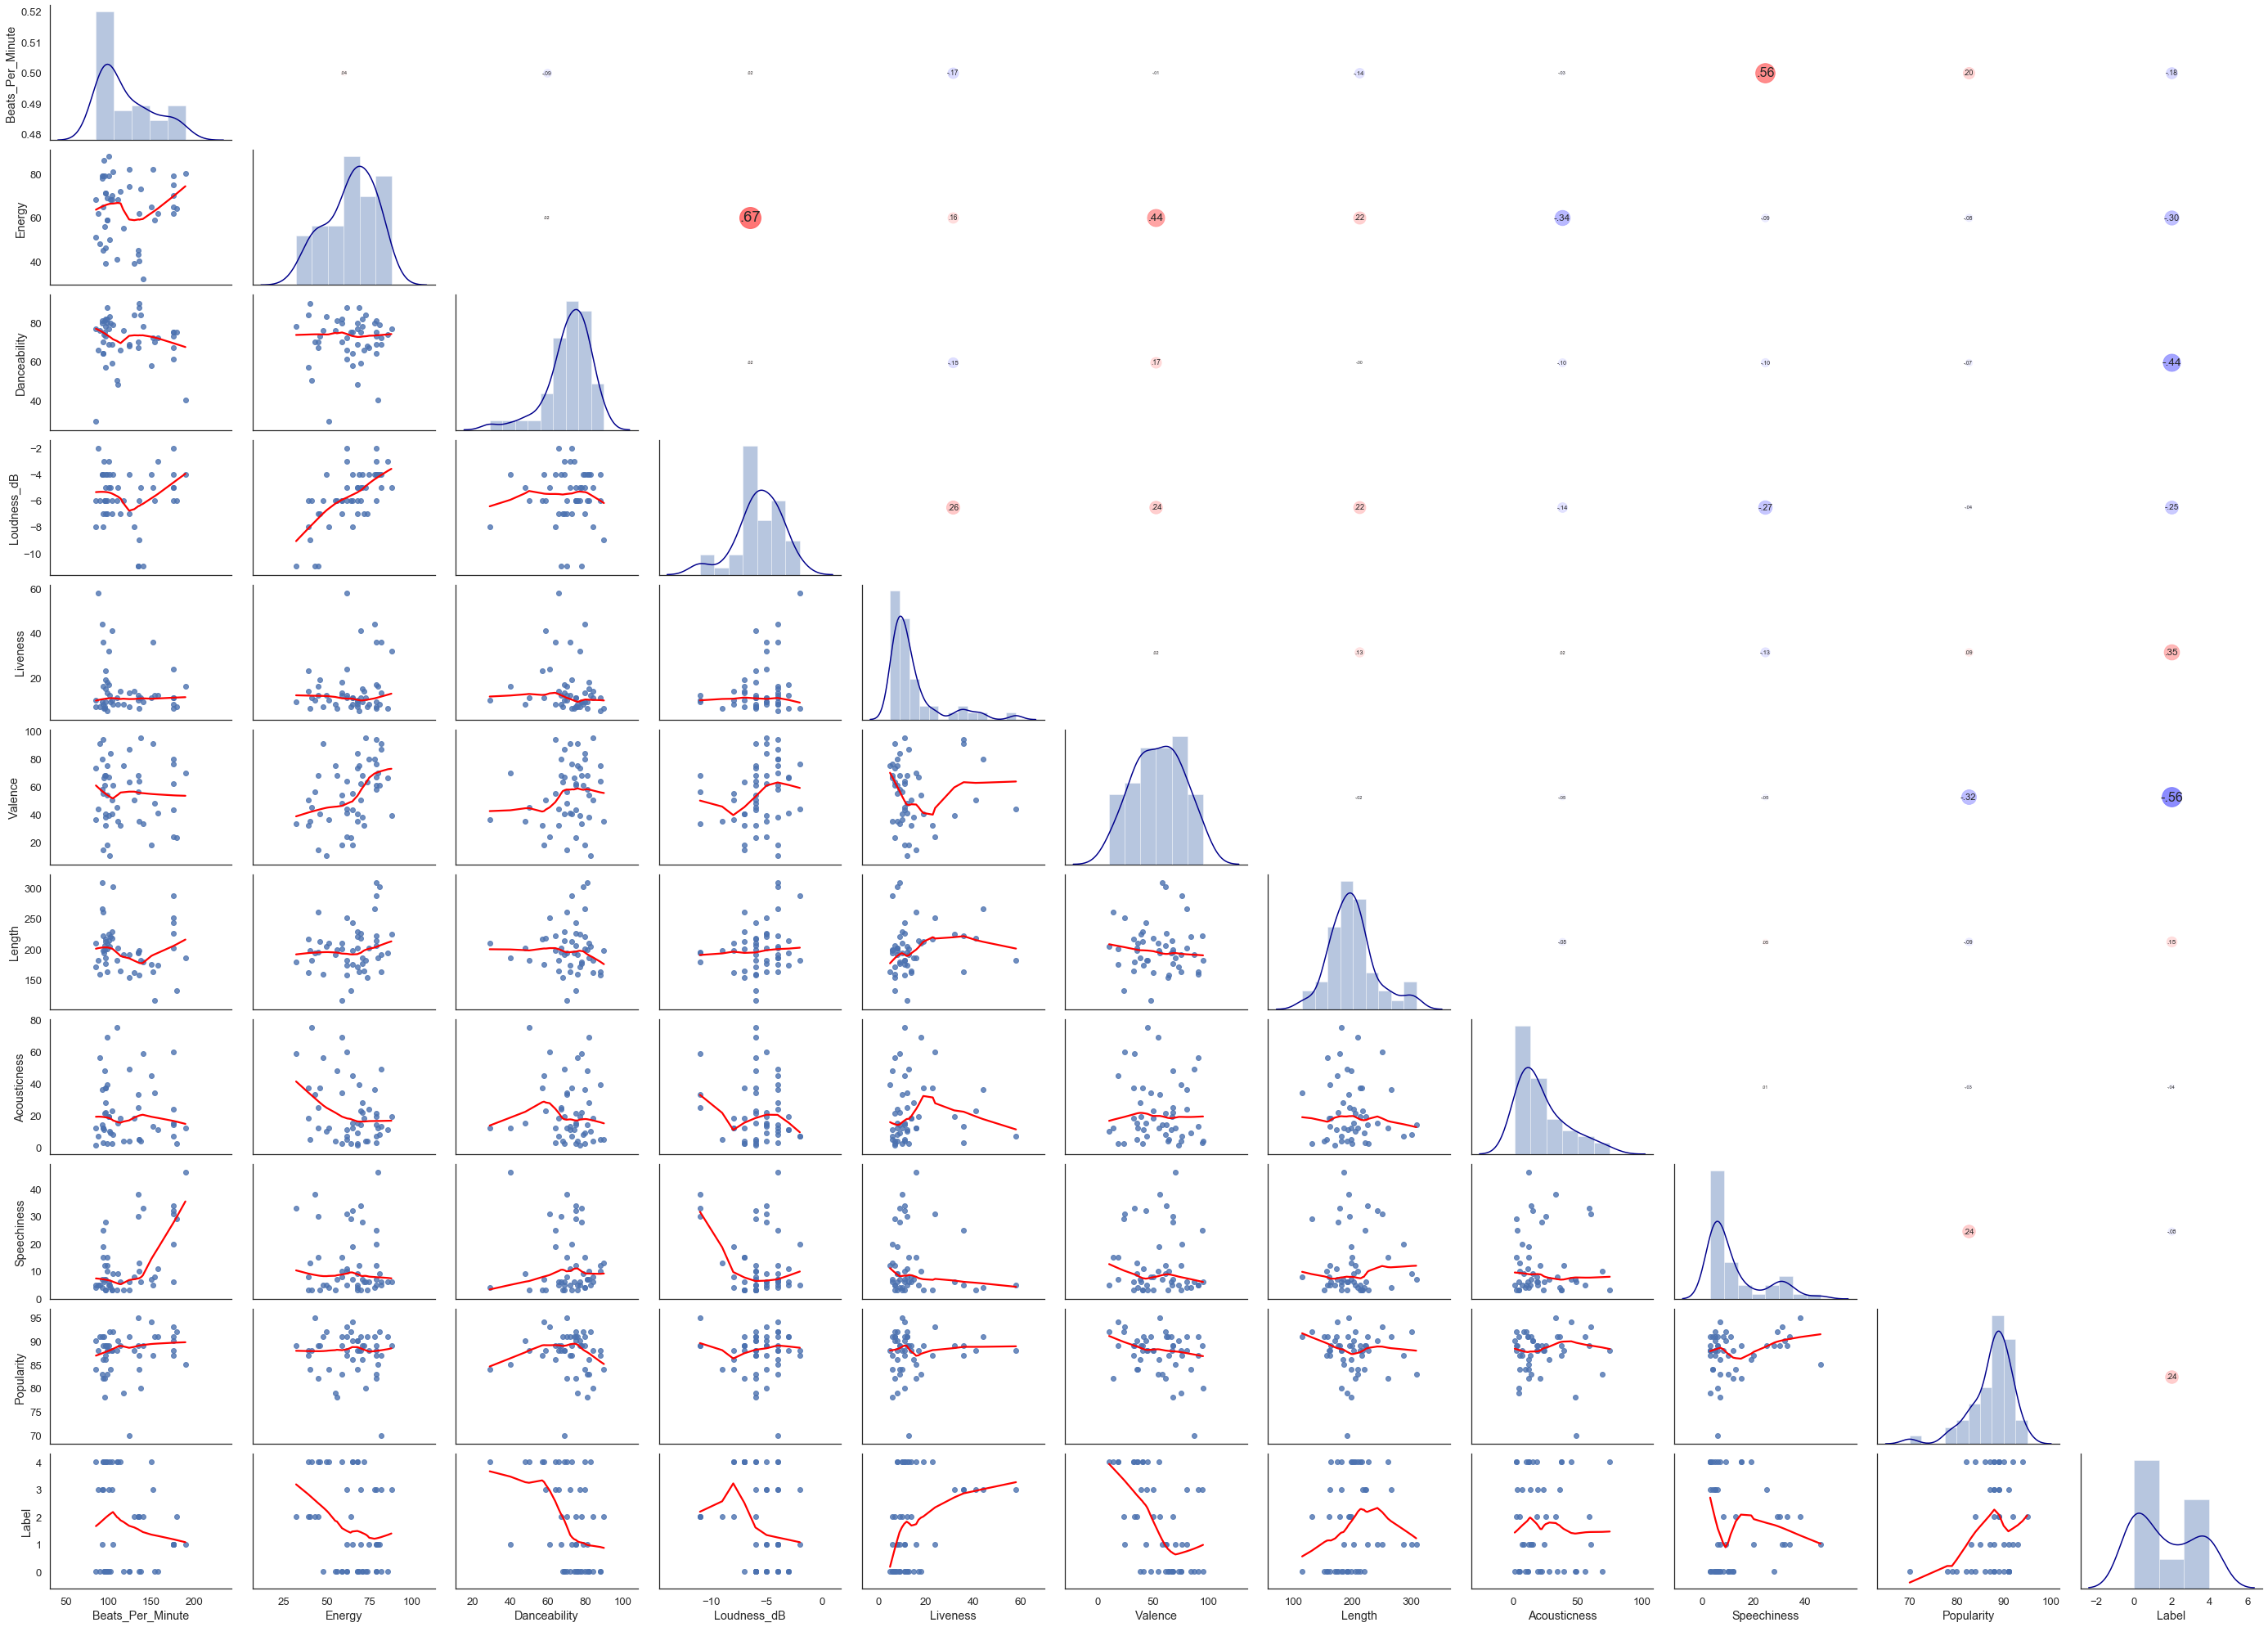

In [48]:
scatter_corr(spotify_df)